In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#####-----    Essentially change this here so that X_raw is a
#####-----    numpy array with all WBA frequencies and nothing else
#####-----    y is all the overallPoF

X_raw = pd.read_csv("./Data/OHE_Eth.csv").iloc[:,1:17].to_numpy()
y = pd.read_csv("./Data/OHE_Eth.csv")["OverallPoF"].to_numpy()

In [3]:
from scipy.interpolate import CubicSpline
x_sp = np.arange(16)

cs=CubicSpline(x_sp,X_raw,axis=1)

X_in = cs(x_sp,1)

In [4]:
n_div = 0.01

x_sp2 = np.arange(0,15+n_div,n_div)
X_sm = cs(x_sp2)
X_ds = cs(x_sp2,1)

In [5]:
from sklearn.model_selection import train_test_split
rs = 22
tr,t = train_test_split([a for a in range(y.shape[0])],train_size=0.85,random_state=rs)

In [6]:
from itertools import combinations
def get_perms(size,num):
    lis = [a for a in range(size)]
    perms = list(combinations(lis,num+1))
    out = [a[0] for a in perms]
    return perms
def get_all_perms(size):
    lis = []
    for a in range(size):
        lis.append(get_perms(size,a))
    return lis

In [7]:
ps = get_all_perms(17)

i1 = [9]

inds = ps[3][1701]
X = X_in[:,inds]
X = np.hstack((X,X_raw[:,i1]))

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

clf = LogisticRegression(C=2,class_weight="balanced",
                         l1_ratio=0,max_iter=1000,
                         penalty='elasticnet',
                         solver = 'saga')
clf.fit(X[tr],y[tr])

LogisticRegression(C=2, class_weight='balanced', l1_ratio=0, max_iter=1000,
                   penalty='elasticnet', solver='saga')

In [9]:
probs = clf.predict_proba(X)[:,1]
s_list = []
scs = []
for a in range(len(probs)):
    for b in range(a+1,len(probs)):
        fd = np.abs(X[a,4]-X[b,4])+0.0001
        pd = np.abs(probs[a]-probs[b])
        sc = pd/fd
        s_list.append([fd,pd,[a,b]])
        scs.append(sc)
imp_inds = s_list[np.argmax(scs)][2]

In [10]:
a = 7750/31
b = 250-a
x_scaled = a*2**(x_sp2/3)+b

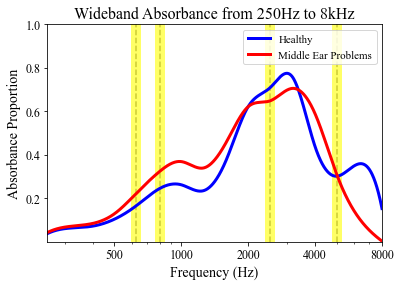

In [11]:
plt.rcParams["font.family"] = "Times New Roman"

plt.plot(x_scaled,X_sm[imp_inds[0]],linewidth=3,color="blue")
plt.plot(x_scaled,X_sm[imp_inds[1]],linewidth=3,color="red")

plt.legend(["Healthy","Middle Ear Problems"],fontsize=11)

plt.xlim(250,8000)
plt.ylim(0,1)

#plt.grid(True)
plt.xscale('log')

plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=12)
plt.xticks([500,1000,2000,4000,8000],fontsize=12)
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Absorbance Proportion",fontsize=14)
plt.title("Wideband Absorbance from 250Hz to 8kHz",fontsize=16)

plt.vlines(630,0,1,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(800,0,1,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(2500,0,1,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(5000,0,1,linestyles='dashed',alpha=0.5,colors="black")


plt.vlines(630,0,1,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(800,0,1,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(2500,0,1,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(5000,0,1,alpha=0.6,colors="yellow",linewidth=10)

plt.savefig("out/WBA_Compare.png",dpi = 600)


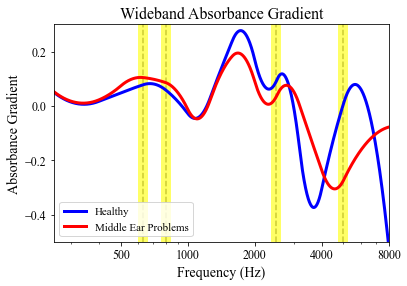

In [12]:
plt.plot(x_scaled,X_ds[imp_inds[0]],linewidth=3,color="blue")
plt.plot(x_scaled,X_ds[imp_inds[1]],linewidth=3,color="red")

plt.legend(["Healthy","Middle Ear Problems"],fontsize=11,loc='lower left')

plt.xlim(250,8000)
plt.ylim(-0.5,0.3)

#plt.grid(True)
plt.xscale('log')

plt.yticks([0.2,0.0,-0.2,-0.4],fontsize=12)
plt.xticks([500,1000,2000,4000,8000],fontsize=12)
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Absorbance Gradient",fontsize=14)
plt.title("Wideband Absorbance Gradient",fontsize=16)

plt.vlines(630,-0.5,0.3,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(800,-0.5,0.3,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(2500,-0.5,0.3,linestyles='dashed',alpha=0.5,colors="black")
plt.vlines(5000,-0.5,0.3,linestyles='dashed',alpha=0.5,colors="black")

plt.vlines(630,-0.5,0.3,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(800,-0.5,0.3,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(2500,-0.5,0.3,alpha=0.6,colors="yellow",linewidth=10)
plt.vlines(5000,-0.5,0.3,alpha=0.6,colors="yellow",linewidth=10)

plt.savefig("out/WBA_Grad_Compare.png",dpi = 600)

In [13]:
co_s = list(-1*clf.coef_[0][:-1])

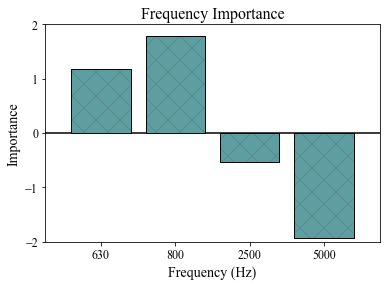

In [14]:
#plt.grid(axis='both',zorder=0)

plt.plot([-10,10],[0,0],color="black")

plt.yticks([2,1,0,-1,-2],fontsize=12)
plt.xticks([0,1,2,3], ["630","800","2500","5000"],fontsize=12)

plt.xlim([-0.75,3.75])
plt.ylim(-2,2)

plt.bar([0,1,2,3],co_s,color="cadetblue",edgecolor="black",zorder=3)
plt.bar([0,1,2,3],co_s,color="cadetblue",edgecolor="black",zorder=3,hatch="x",alpha=0.1)

plt.xlabel("Frequency (Hz)",fontsize=14)
plt.ylabel("Importance",fontsize=14)
plt.title("Frequency Importance",fontsize=16)


plt.savefig("out/Coef_Compare.png",dpi = 600)

In [15]:
tr_prop_x = np.arange(0.2,0.99,0.01)*X.shape[0]

test_sens = np.array(
[[0.6540981728475219, 0.7666666666666667, 0.5510567296996663],
 [0.662178572172965, 0.7666666666666667, 0.5714285714285714],
 [0.665814630063453, 0.7666666666666667, 0.5714285714285714],
 [0.6716783789627028, 0.7666666666666667, 0.585632183908046],
 [0.6788505550142856, 0.7692307692307693, 0.6],
 [0.6783674899496431, 0.7730205278592375, 0.5925925925925926],
 [0.6818693447546633, 0.7777777777777777, 0.5925925925925926],
 [0.6796370073767943, 0.7741935483870968, 0.5862068965517241],
 [0.6854042751407741, 0.7777777777777777, 0.6],
 [0.6889356867241513, 0.7777777777777777, 0.6071428571428571],
 [0.690445111498683, 0.7916666666666666, 0.6],
 [0.6953701214623074, 0.782608695652174, 0.620361247947455],
 [0.6951302754888481, 0.7857142857142857, 0.6086956521739131],
 [0.6972175512745216, 0.7857142857142857, 0.6206896551724138],
 [0.7003631995489439, 0.7916666666666666, 0.625],
 [0.70664850579084, 0.8, 0.625],
 [0.7066724296338573, 0.8, 0.6296296296296297],
 [0.70273264927037, 0.7894736842105263, 0.6333333333333333],
 [0.7069857434433816, 0.7916666666666666, 0.6296296296296297],
 [0.7030583811539557, 0.7894736842105263, 0.625],
 [0.7099355860343041, 0.8, 0.631578947368421],
 [0.7099538340562878, 0.8, 0.625],
 [0.7203512524723701, 0.8095238095238095, 0.6363636363636365],
 [0.7160388727400411, 0.8, 0.6422857142857143],
 [0.7132308620708245, 0.8, 0.625],
 [0.7127561371738147, 0.8095238095238095, 0.631578947368421],
 [0.7127387566139863, 0.8, 0.631578947368421],
 [0.7143121477096269, 0.8, 0.631578947368421],
 [0.7157021386136753, 0.8080586080586082, 0.6428571428571429],
 [0.7191481000564922, 0.8101190476190477, 0.6363636363636365],
 [0.7190758667588375, 0.8125, 0.631578947368421],
 [0.7236634753549173, 0.8181818181818182, 0.6363636363636365],
 [0.7255292264820651, 0.8235294117647058, 0.631578947368421],
 [0.7211973055139174, 0.8125, 0.631578947368421],
 [0.7262305798788341, 0.8235294117647058, 0.6428571428571429],
 [0.7295752960599746, 0.8235294117647058, 0.6428571428571429],
 [0.7253763548563877, 0.8235294117647058, 0.631578947368421],
 [0.7393867118917411, 0.8333333333333334, 0.6500000000000001],
 [0.7247333711242095, 0.8235294117647058, 0.6354066985645934],
 [0.7293885100602572, 0.8235294117647058, 0.6428571428571429],
 [0.7293098633308704, 0.8333333333333334, 0.631578947368421],
 [0.7277407087918513, 0.8333333333333334, 0.631578947368421],
 [0.7323564691761925, 0.8333333333333334, 0.625],
 [0.7309402748699828, 0.8333333333333334, 0.625],
 [0.7332849234360709, 0.8461538461538461, 0.631578947368421],
 [0.7323700419480387, 0.8333333333333334, 0.6363636363636365],
 [0.73184416513569, 0.8333333333333334, 0.6354066985645934],
 [0.7375790450562509, 0.8571428571428572, 0.625],
 [0.739142460661114, 0.8469230769230771, 0.625],
 [0.7401545516059448, 0.8571428571428572, 0.6363636363636365],
 [0.7451758734815237, 0.8666666666666667, 0.6363636363636365],
 [0.7355889704550695, 0.8571428571428572, 0.608888888888889],
 [0.7462206328801917, 0.875, 0.6363636363636365],
 [0.7489743142736177, 0.875, 0.6363636363636365],
 [0.7412156430171136, 0.8666666666666667, 0.625],
 [0.7388566214830921, 0.8571428571428572, 0.6230769230769232],
 [0.7485005248019955, 0.875, 0.625],
 [0.7573486960751665, 0.8777777777777784, 0.6340909090909093],
 [0.7444474553224554, 0.875, 0.625],
 [0.742797297147297, 0.875, 0.6],
 [0.7520876532314441, 0.8888888888888888, 0.6],
 [0.7444512820512821, 0.875, 0.6123076923076924],
 [0.751220392107892, 0.8888888888888888, 0.6],
 [0.7525594266844267, 0.8888888888888888, 0.6],
 [0.7658688838938839, 1.0, 0.6],
 [0.7588765560987784, 1.0, 0.6],
 [0.7548044927294927, 1.0, 0.6],
 [0.7466932783315549, 1.0, 0.5714285714285714],
 [0.7637716359575656, 1.0, 0.6],
 [0.7624119921703002, 1.0, 0.5494949494949496],
 [0.7662056548628267, 1.0, 0.5714285714285714],
 [0.7901729255387792, 1.0, 0.6],
 [0.7575644068634723, 1.0, 0.5],
 [0.7559611436583046, 1.0, 0.5],
 [0.7857831141021719, 1.0, 0.5],
 [0.7823606434717545, 1.0, 0.5],
 [0.7818524269611227, 1.0, 0.5],
 [0.8014248704663213, 1.0, 0.5],
 [0.795826036193812, 1.0, 0.5]]
)

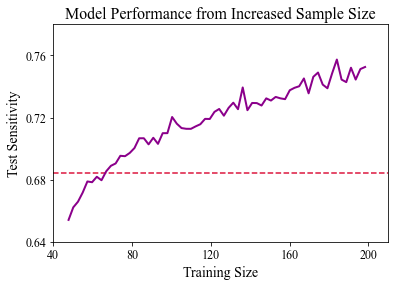

In [16]:
plt.hlines(0.6842,40,210,linestyle="dashed",color="crimson")

plt.plot(tr_prop_x[tr_prop_x<200],test_sens[:,0][tr_prop_x<200],linewidth=2,color="darkmagenta")

plt.ylim(0.64,0.78)
plt.xlim(40,210)

#plt.grid(True,alpha=0.3)

plt.xticks([40,80,120,160,200],fontsize=12)
plt.yticks([0.64,0.68,0.72,0.76],fontsize=12)

plt.xlabel("Training Size",fontsize=14)
plt.ylabel("Test Sensitivity",fontsize=14)
plt.title("Model Performance from Increased Sample Size",fontsize=16)

plt.savefig("out/Train_Compare.png",dpi = 600)

In [24]:
n_child = 100

p_w = np.mean(y)
p_wo = 1-p_w

c_p = 5000
c_fn= 20000

b_se = 0.68
b_sp = 0.77
b_a  =  b_sp*p_wo + b_se*p_w

m_se = 0.79
m_sp = 0.77
m_a  =  m_sp*p_wo + m_se*p_w

mcb = n_child*((c_p*p_wo*(1-b_sp)) + (c_fn*p_w*(1-b_se))) +49700
mcm = n_child*((c_p*p_wo*(1-m_sp)) + (c_fn*p_w*(1-m_se))) +55300
mcd = n_child*p_w*c_fn

vcb = 1-b_se
vcm = (1-m_se)
vcd = 1

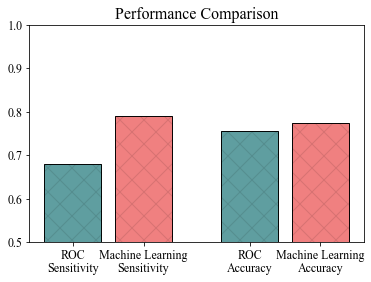

In [18]:
plt.ylim(0.5,1)

plt.xticks([1,3.5,2,4.5],labels=["ROC\nSensitivity",
                             "ROC\nAccuracy",
                             "Machine Learning\nSensitivity",
                             "Machine Learning\nAccuracy"],
           fontsize=12)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=12)

plt.bar([1,3.5],[b_se,b_a],color="cadetblue",edgecolor="black")
plt.bar([1,3.5],[b_se,b_a],color="cadetblue",edgecolor="black",hatch="x",alpha=0.1)
plt.bar([2,4.5],[m_se,m_a],color="lightcoral",edgecolor="black")
plt.bar([2,4.5],[m_se,m_a],color="lightcoral",edgecolor="black",hatch="x",alpha=0.1)

plt.title("Performance Comparison",fontsize=16)


plt.savefig("out/Sens_Acc_Compare.png",dpi = 600)

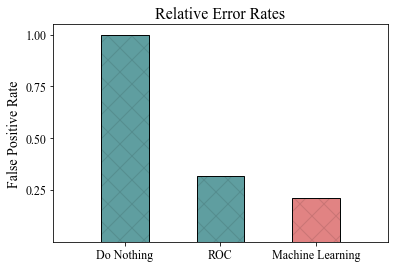

In [19]:
plt.xticks([0,1,2],labels=["Do Nothing","ROC","Machine Learning"],fontsize=12)
plt.yticks([0.25,0.5,0.75,1],fontsize=12)

plt.ylabel("False Positive Rate",fontsize=14)

plt.xlim([-0.75,2.75])

plt.bar([0,1],[vcd,vcb],color="cadetblue",edgecolor="black",width = 0.5)
plt.bar([2],[vcm],color="lightcoral",edgecolor="black",width = 0.5)
plt.bar([0,1],[vcd,vcb],color="cadetblue",edgecolor="black",width = 0.5,hatch="x",alpha=0.1)
plt.bar([2],[vcm],color="cadetblue",edgecolor="black",width = 0.5,hatch="x",alpha=0.1)

plt.title("Relative Error Rates",fontsize=16)


plt.savefig("out/FPR_Compare.png",dpi = 600)

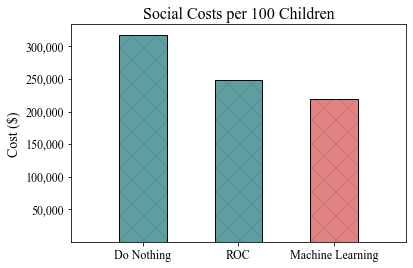

In [25]:
import matplotlib.patches as mpatches

plt.xticks([0,1,2],labels=["Do Nothing","ROC","Machine Learning"],fontsize=12)
plt.yticks([400000,350000,300000,250000,200000,150000,100000,50000],
           labels=["400000","350,000","300,000","250,000","200,000","150,000","100,000","50,000"],fontsize=12)

plt.ylabel("Cost ($)",fontsize=14)

plt.xlim([-0.75,2.75])

plt.bar([0,1],[mcd,mcb],color="cadetblue",edgecolor="black",width = 0.5)
plt.bar([2],[mcm],color="lightcoral",edgecolor="black",width = 0.5)
plt.bar([0,1],[mcd,mcb],color="cadetblue",edgecolor="black",width = 0.5,hatch="x",alpha=0.1)
plt.bar([2],[mcm],color="cadetblue",edgecolor="black",width = 0.5,hatch="x",alpha=0.1)

plt.title("Social Costs per 100 Children",fontsize=16)

plt.savefig("out/Cost_Compare.png",dpi = 600,bbox_inches='tight')

In [27]:
[mcd,mcb,mcm]

[317991.6317991632, 248172.8033472803, 218793.72384937239]